In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def update_bias(bias, grad_bias, lr = 1):

    updated_bias = np.subtract(bias, np.multiply(grad_bias, lr))

    return updated_bias


def update_weight(weights, final_del_cost__by__del_w_mtx, lr = 1):
    
    updated_weights = np.subtract(weights, np.multiply(final_del_cost__by__del_w_mtx, lr))
    
    return updated_weights

In [16]:
def compute_local_del_z__by__del_b():
    
    return 1


def compute_local_del_z__by__del_w_mtx(x):
    
    return x

In [17]:
def compute_local_del_y_hat__by__del_z_vector(z):

    grad_wrt_z = [sigmoid(output) * (1 - sigmoid(output)) for output in z]

    return grad_wrt_z

In [18]:
def compute_final_del_cost__by__del_b_mtx(y, y_hat):
        
    final_del_cost__by__del_z = compute_final_del_cost__by__del_z_vector(y, y_hat, z).reshape(-1, 4)
    local_del_z__by__del_b_mtx = compute_local_del_z__by__del_b()
    
    final_del_cost__by__del_b = np.multiply(final_del_cost__by__del_z, local_del_z__by__del_b_mtx)

    final_del_cost__by__del_b = final_del_cost__by__del_b.reshape(-1, 4)
    
    final_grad = np.sum(final_del_cost__by__del_b)
    
    
    return final_grad


def compute_final_del_cost__by__del_w_mtx(y, y_hat, z, x):
        
    final_del_cost__by__del_z = compute_final_del_cost__by__del_z_vector(y, y_hat, z).reshape(-1, 4)
    local_del_z__by__del_w = compute_local_del_z__by__del_w_mtx(x)
    
    final_del_cost__by__del_w_mtx = np.matmul(final_del_cost__by__del_z, local_del_z__by__del_w).reshape(-1)
    
    return final_del_cost__by__del_w_mtx


def compute_final_del_cost__by__del_z_vector(y, y_hat, z):
        
    del_cost__by__del_y_hat = compute_local_del_cost__by__del_y_hat_vector(y, y_hat)
    del_y_hat__by__del_z = compute_local_del_y_hat__by__del_z_vector(z)
    
    del_cost__by__del_z = np.multiply(del_cost__by__del_y_hat, del_y_hat__by__del_z)
    
    return del_cost__by__del_z


def compute_local_del_cost__by__del_y_hat_vector(y, y_hat):
        
    grad_array = np.array([])
    for _y, _y_hat in zip(y, y_hat):
        
        local_gradient = -np.divide(_y, _y_hat) + np.divide((1 - _y), (1 - _y_hat))
        grad_array = np.append(grad_array, local_gradient)

    grad_array = np.divide(grad_array, len(y))

    return grad_array

In [19]:
def compute_bce(y, y_hat):
    """
    -1/m(y * log(y_hat) + (1 - y) * log(1 - y_hat))
    """
    true_event_prob = np.multiply(np.log(y_hat), y)

    one__sub__y = np.subtract(1, y)
    one__sub__y_hat = np.subtract(1, y_hat)
    false_event_prob_iii = np.multiply(one__sub__y, np.log(one__sub__y_hat))

    cost_elem = np.concatenate((true_event_prob, false_event_prob_iii))

    cost = np.sum(cost_elem)

    avg_cost = -np.divide(cost, len(y))

    return avg_cost

In [20]:
def sigmoid(z):
    
    denom = np.add(1, np.exp(-z))
    
    sig = np.divide(1, denom)
    
    return sig

In [21]:
def forward_propagation(d_train_transpose, weights, b, y, training_cost, prediction_accuracy):

    z_temp = np.dot(weights, d_train_transpose)

    z = np.add(z_temp, b)

    y_hat = sigmoid(z)
    prediction_accuracy = np.append(prediction_accuracy, y_hat)
    
    cost = compute_bce(y, y_hat)
    training_cost.append(cost)
    
    return (z, y_hat, prediction_accuracy)
    

In [22]:
def backward_propagation(d_train, z, y, y_hat):


    local_del_cost__by__del_y_hat_vector = compute_local_del_cost__by__del_y_hat_vector(y, y_hat)

    local_del_y_hat__by__del_z_vector = compute_local_del_y_hat__by__del_z_vector(z)

    final_del_cost__by__del_z_vector = compute_final_del_cost__by__del_z_vector(y, y_hat, z)

    local_del_z__by__del_w_mtx = compute_local_del_z__by__del_w_mtx(d_train)

    final_del_cost__by__del_w_mtx = compute_final_del_cost__by__del_w_mtx(y, y_hat, z, d_train)

    local_del_z__by__del_b = compute_local_del_z__by__del_b()

    final_del_cost__by__del_b = compute_final_del_cost__by__del_b_mtx(y, y_hat)
    
    return (final_del_cost__by__del_w_mtx, final_del_cost__by__del_b)


In [23]:
data = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]], dtype = 'float32')

d_train = data[:, :2]
d_train

y = data[:, 2]
y

d_train_transpose = d_train.T
d_train_transpose

array([[0., 0., 1., 1.],
       [0., 1., 0., 1.]], dtype=float32)

In [24]:
weights = np.array([0.1, 0.6])
b = 0
epochs = 1000
training_cost = list()
prediction_accuracy = np.array([])

for epoch in range(epochs):

    """
    Forward propagation
    """
    z, y_hat, prediction_accuracy = forward_propagation(d_train_transpose, weights, b, y, training_cost, prediction_accuracy)

    
    """
    Backward propagation
    
    """    
    final_del_cost__by__del_w_mtx, final_del_cost__by__del_b = backward_propagation(d_train, z, y, y_hat)


    """
    Update weight and bias

    """
    weights = update_weight(weights, final_del_cost__by__del_w_mtx)

    b = update_bias(b, final_del_cost__by__del_b)

In [25]:
training_cost[-5:]

[0.01745968813487083,
 0.017442175422675548,
 0.017424697424562055,
 0.01740725403814747,
 0.01738984516144885]

In [26]:
prediction_accuracy = prediction_accuracy.reshape((epochs, 4))
prediction_accuracy[-5:]

array([[1.25447648e-05, 2.02896996e-02, 2.02896941e-02, 9.71582117e-01],
       [1.25066432e-05, 2.02696033e-02, 2.02695979e-02, 9.71610282e-01],
       [1.24686750e-05, 2.02495464e-02, 2.02495410e-02, 9.71638392e-01],
       [1.24308595e-05, 2.02295287e-02, 2.02295233e-02, 9.71666447e-01],
       [1.23931959e-05, 2.02095501e-02, 2.02095447e-02, 9.71694447e-01]])

In [27]:
y_hat_accuracy = prediction_accuracy[:, -1]
y_hat_accuracy[-5:]

array([0.97158212, 0.97161028, 0.97163839, 0.97166645, 0.97169445])

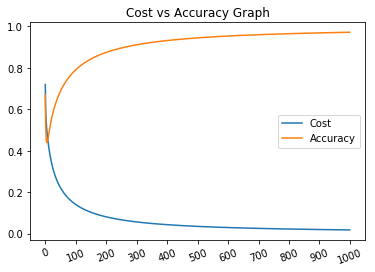

In [28]:
x_axis_coords = np.arange(0, epochs, 1)

"""
Plotting cost graph
"""
plt.plot(x_axis_coords, training_cost, label = "Cost")

x_axis_ticks = np.arange(0, epochs+1, 100)
x_axis_labels = np.arange(0, epochs+1, 100)
plt.xticks(x_axis_ticks, x_axis_labels, rotation=20)


"""
Plotting y_hat_accuracy graph
"""
plt.plot(x_axis_coords, y_hat_accuracy, label = "Accuracy")
plt.title("Cost vs Accuracy Graph")
plt.legend()
plt.show()

#### Model predictions

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
classification_threshold = 0.9

In [59]:
def get_predicted_output(predicted_probs, classification_threshold):
    
    return [1 if predicted_prob > classification_threshold else 0 for predicted_prob in predicted_probs]

In [60]:
def make_prediction_prob(weights, test_points_input):

    z_temp = np.dot(weights, test_points_input)

    z = np.add(z_temp, b)

    y_hat = sigmoid(z)
    
    return y_hat

In [61]:
test_predictions_probs = make_prediction_prob(weights, d_train_transpose)
test_predictions_probs

array([1.23556835e-05, 2.01896104e-02, 2.01896051e-02, 9.71722392e-01])

In [63]:
predicted_output = get_predicted_output(test_predictions_probs, classification_threshold)

In [64]:
accuracy = accuracy_score(y, predicted_output)
accuracy

1.0